In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
train = pd.read_csv('D:/DataScience/Git_Hub/NLP_Problems/Toxic_Comment/train.csv')

In [10]:
test = pd.read_csv('D:/DataScience/Git_Hub/NLP_Problems/Toxic_Comment/test.csv')

In [11]:
train.shape,test.shape

((159571, 8), (153164, 2))

In [7]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

### Feature Selection

In [12]:
list_sentence_train = train['comment_text'].fillna('nullValues').values
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
y = train[labels].values
list_sentence_test = test['comment_text'].fillna('nullValues').values

### Preprocessing

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
vocab_size = 20000 #Number of unique words to use
max_len = 120 #length of sentence 

In [15]:
tokenizer = Tokenizer(num_words=vocab_size)

In [16]:
tokenizer.fit_on_texts(list_sentence_train)

In [17]:
tokenized_train = tokenizer.texts_to_sequences(list_sentence_train)
tokenized_test = tokenizer.texts_to_sequences(list_sentence_test)

In [18]:
X_train = pad_sequences(tokenized_train,maxlen=max_len)
X_test = pad_sequences(tokenized_test,maxlen=max_len)

In [19]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'you': 6,
 'i': 7,
 'is': 8,
 'that': 9,
 'in': 10,
 'it': 11,
 'for': 12,
 'this': 13,
 'not': 14,
 'on': 15,
 'be': 16,
 'as': 17,
 'have': 18,
 'are': 19,
 'your': 20,
 'with': 21,
 'if': 22,
 'article': 23,
 'was': 24,
 'or': 25,
 'but': 26,
 'page': 27,
 'wikipedia': 28,
 'my': 29,
 'an': 30,
 'from': 31,
 'by': 32,
 'do': 33,
 'at': 34,
 'me': 35,
 'about': 36,
 'so': 37,
 'talk': 38,
 'what': 39,
 'can': 40,
 'there': 41,
 'all': 42,
 'has': 43,
 'will': 44,
 'please': 45,
 'no': 46,
 'would': 47,
 'one': 48,
 'like': 49,
 'just': 50,
 'they': 51,
 'he': 52,
 'which': 53,
 'any': 54,
 'been': 55,
 'should': 56,
 'more': 57,
 'we': 58,
 "don't": 59,
 'some': 60,
 'other': 61,
 'who': 62,
 'here': 63,
 'see': 64,
 'also': 65,
 'his': 66,
 'think': 67,
 'because': 68,
 'know': 69,
 'how': 70,
 'edit': 71,
 'am': 72,
 "i'm": 73,
 'people': 74,
 'why': 75,
 'up': 76,
 'only': 77,
 "it's": 78,
 'out': 79,
 'articles': 80,
 'use': 81,

### Model - LSTM

In [20]:
emd_dim = 16

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,emd_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 120, 100)          26800     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 306       
Total params: 352,156
Trainable params: 352,156
Non-trainable params: 0
________________________________________________

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
batch_size = 264
epochs = 3
history = model.fit(X_train,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 127656 samples, validate on 31915 samples
Epoch 1/3
127656/127656 [==============================] - 194s 2ms/sample - loss: 0.1485 - acc: 0.9521 - val_loss: 0.0564 - val_acc: 0.9802
Epoch 2/3
127656/127656 [==============================] - 203s 2ms/sample - loss: 0.0516 - acc: 0.9814 - val_loss: 0.0500 - val_acc: 0.9817
Epoch 3/3
127656/127656 [==============================] - 186s 1ms/sample - loss: 0.0457 - acc: 0.9830 - val_loss: 0.0495 - val_acc: 0.9820


In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

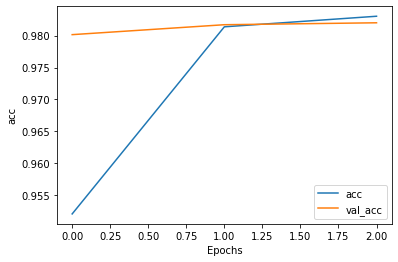

In [36]:
plot_graphs(history,'acc')

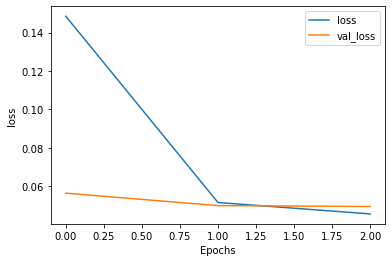

In [37]:
plot_graphs(history,'loss')

In [44]:
sample1 = pd.read_csv('D:/DataScience/Git_Hub/NLP_Problems/Toxic_Comment/sample_submission.csv')

In [45]:
sample1.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [41]:
sample.shape

(153164, 7)

In [42]:
sample[labels] = model.predict([X_test],batch_size=1024,verbose=1)

153164/153164 [==============================] - 50s 329us/sample


In [43]:
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.991387,0.198871,0.955137,0.037564,0.833645,0.140347
1,0000247867823ef7,0.000656,0.000001,0.000138,0.000011,0.000060,0.000038
2,00013b17ad220c46,0.001019,0.000003,0.000189,0.000021,0.000103,0.000069
3,00017563c3f7919a,0.001752,0.000002,0.000278,0.000019,0.000156,0.000071
4,00017695ad8997eb,0.009598,0.000030,0.001162,0.000157,0.001219,0.000497


In [46]:
sample.to_csv('submission.csv', index=False)